In [15]:
%load helpers

from helpers import *
from classes import *


In [16]:
from helpers import create_wave_samples
ys, ts, framerate = get_wave_samples('audio.wav')

from classes import Wave
Wave(ys, ts, framerate).play()
#Signal(freq=10000).create_wave().plot_full_fft()

In [17]:
from helpers import create_wave_samples, plot

class Signal:

  def __init__(self, amplitude=1.0, frequency=440, offset=0):
    self.amplitude = amplitude
    self.frequency = frequency
    self.offset = offset
  
  def print_period(self):
    print("Period is %f" %(1/self.frequency))
    print("Ys size: %s" %(len(self.ys)))
  
  def create_wave(self, duration=2, framerate=3000):
    ys, ts = create_wave_samples(duration, framerate, self.frequency, self.amplitude)
    self.ys = ys
    self.ts = ts
    return ys
  
  def plot(self):
    return plot(self.ts[0:100], self.ys[0:100])

signal = Signal(2.0)
#wave = signal.create_wave()
signal.print_period()

Period is 0.002273


AttributeError: ignored

In [18]:
%load classes
from classes import Signal, Wave

In [19]:
import numpy as np

class SinWaveformBasedSignal(Signal):

  function = np.sin

  def __init__(self, *args, **kwargs):
    super().__init__(*args, **kwargs)
  

  def create_wave(self, duration=2, framerate=3000):
    ys, ts = create_wave_samples(duration, framerate, self.freq, self.amp, periodic_function=self.function)
    self.ys = ys
    self.ts = ts
    return Wave(ys, ts, framerate=framerate)


In [20]:

SinWaveformBasedSignal().create_wave().play()

Period (s): 0.002500


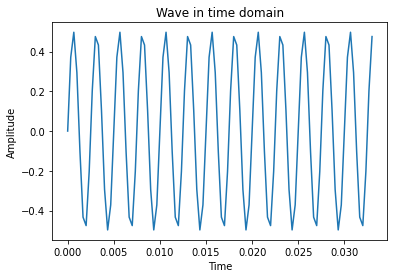

In [21]:
class ScaleBy2Mixin:
  def scale(self, ys):
    return self.ys /2

class AugmentedWave(Wave, ScaleBy2Mixin ):
  def scale(self):
    return super().scale(self.ys)

class NewSignal(SinWaveformBasedSignal):
  def create_wave(self, duration=2, framerate=3000):
    ys, ts = create_wave_samples(duration, framerate, self.freq, self.amp, periodic_function=self.function)
    self.ys = ys
    self.ts = ts
    return AugmentedWave(ys, ts, framerate=framerate)

wave = NewSignal().create_wave()
wave.ys = wave.scale()
wave.plot()

wave = NewSignal().print_period()

In [22]:
class WaveWithMul(Wave):

  def __mul__(self, other):
    ys = self.ys * other.ys
    return WaveWithMul(ys, self.ts, self.framerate)

  @staticmethod
  def convert(wave: Wave):
    return WaveWithMul(ys=wave.ys, ts=wave.ts, framerate=wave.framerate)


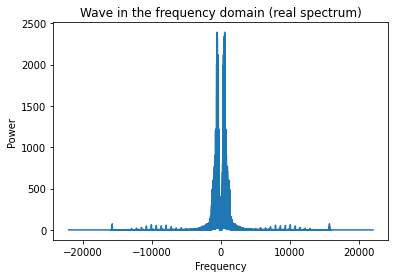

In [29]:
from abc import abstractmethod
from classes import Signal
import numpy as np
import matplotlib.pyplot as plt

class Modulator:
  @abstractmethod
  def modulate(self, signal_wave: Wave, carrier_wave: Wave):
    raise NotImplementedError("You need to implement this method before calling it")
  
  @abstractmethod
  def modulate(self, signal_wave: Wave, carrier_wave: Wave):
    raise NotImplementedError("You need to implement this method before calling it")
    
class AMModulator(Modulator):
  @abstractmethod
  def modulate(self, signal_wave: Wave, carrier_wave: Wave):
    return signal_wave * carrier_wave
  
  @abstractmethod
  def demodulate(self, modulated_wave: Wave, carrier_wave: Wave):
    return modulated_wave * carrier_wave

from classes import get_wave_samples
ys, ts, framerate = get_wave_samples('audio.wav')
information_wave = Wave(ys, ts, framerate)

information_wave_m = WaveWithMul.convert(information_wave)
carrier_wave  = Signal(freq=100000, periodic_function=np.cos).create_wave(duration=information_wave.duration, framerate=simple_wave_m.framerate)
carrier_wave_m = WaveWithMul.convert(carrier_wave)

amplitude_modulator = AMModulator()
modulated_wave = amplitude_modulator.modulate(information_wave_m, carrier_wave_m)


information_wave_m.plot_full_fft()
modulated_wave.play()

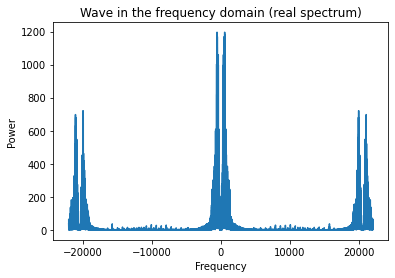

In [31]:
demodulated_wave = amplitude_modulator.demodulate(modulated_wave, carrier_wave_m)
demodulated_wave.plot_full_fft()

In [ ]:
from collections.abc import Iterator, Iterable

class Iterator:

  @abstractmethod
  def next(self):
    raise NotImplemented("")
  
  @abstractmethod
  def has_next(self):
    raise NotImplemented("")



class SequentialIterator(Iterator):
  
  _i = 0

  def __init__(self, collection):
    self.collection = collection

  def next(self):
    element = self.collection[self._i]
    self._i = self._i +1
    return element

  def has_next(self):
    return self._i < len(self.collection)

class Iterable:
  pass


class IterableWave(Wave, Iterable):
  pass



wave = Signal().create_wave()
iterable_wave = IterableWave(wave.ys, wave.ts, wave.framerate)

sequential_iterator = SequentialIterator(wave.ys[0:10])
while(sequential_iterator.has_next()):
  print(sequential_iterator.next())


0.0
0.7431448254773941
0.9945218953682734
0.5877852522924732
-0.20791169081775907
-0.8660254037844388
-0.9510565162951536
-0.4067366430757993
0.4067366430757997
0.9510565162951538


In [ ]:
from collections.abc import Iterator, Iterable

class SequentialIterator(Iterator):
  
  

  def __init__(self, collection):
    self.collection = collection
    self._i = 0

  def __next__(self):
    try:
      element = self.collection[self._i]
      self._i = self._i +1
      return element
    except IndexError:
      raise StopIteration

class Iterable:
  pass


class IterableWave(Wave, Iterable):
  pass



wave = Signal().create_wave()
iterable_wave = IterableWave(wave.ys, wave.ts, wave.framerate)

sequential_iterator = SequentialIterator(wave.ys[0:10])

for element in sequential_iterator:
  print(element)


0.0
0.7431448254773941
0.9945218953682734
0.5877852522924732
-0.20791169081775907
-0.8660254037844388
-0.9510565162951536
-0.4067366430757993
0.4067366430757997
0.9510565162951538
